# UT3 - Práctica 3

## Ejercicio 1

Antes de empezar a trabajar, tendrás que importar las librerías de NumPy y Matplotlib.Pyplot para poder trabajar con ellas:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## Ejercicio 2

Haz una función que recibiendo una matriz cuadrada de dimensiones impares (siempre tendrá un punto central) de NumPy, devuelva la media de todos sus elementos sin tener en cuenta el valor del punto central:

In [9]:
def mediaSCentral(matriz):
    suma = 0
    f = 0
    for fila in matriz:
        c = 0
        for columna in fila:
            if (f != int(matriz.shape[0]/2) or c != int(matriz.shape[1]/2)):
                suma += columna
            c += 1
        f += 1
    return suma/(matriz.size-1)

matriz = np.random.randint(10, size=(3,3))

print(matriz)
print(mediaSCentral(matriz))

[[4 9 4]
 [9 3 3]
 [5 5 6]]
5.625


---
## Ejercicio 3

Crea una función que, utilizando la función definida en el ejercicio 2, "elimine" el ruido de la imagen recibida utilizando una máscara de un tamaño también recibido como parámetro. La función devolverá una copia de la imagen modificada:

In [10]:
def limpiaRuido(matriz, size):
    matrizLimpia = matriz.copy()
    mitad = int(size/2)
    f = 0
    for fila in matrizLimpia:
        c = 0
        for columna in fila:
            matrizLimpia[f,c] = mediaSCentral(matrizLimpia[f-mitad:f+mitad+1,c-mitad:c+mitad+1])
            c += 1
        f += 1
    return matrizLimpia

# matriz = np.random.randint(10, size=(7,7))
# print(matriz)
# print("-------------------")
# f, c, size = 4,4,3
# otramatriz = matriz[f-int(size/2):f+int(size/2)+1,c-int(size/2):c+int(size/2)+1]
# print(otramatriz)

---
## Ejercicio 4

Importa las imágenes "spn_lenna.png" y "spn_ci_3.png". Visualizalas desde Windows para ver la cantidad de "ruido" que contienen. A continuación, utiliza la función anterior para tratar de eliminar el ruido de ambas utilizando distintos tamaños de máscaras (3,7,21). Guarda todos los resultados obtenidos y compáralos con las imágenes originales ("lenna_gris.png" y "paisaje_gris.png"):

In [11]:
def colorToGrayscale2(img, r=0.2989, g=0.587, b=0.114):
    grayimg = img.copy()
    grayimg = (r*grayimg[:,:,0] + g*grayimg[:,:,1] + b*grayimg[:,:,2])/255 # Función para pasar rgb a grayscale
    return grayimg

Vamos a reutilizar la función para pasar a grayscale porque las imágenes no están en este formato

(512, 512)
(1050, 1400)


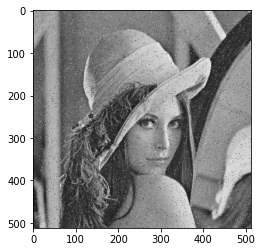

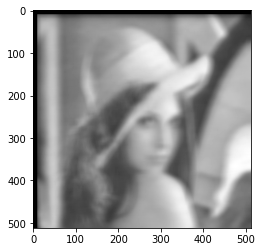

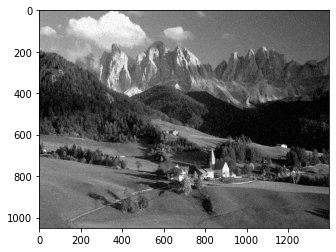

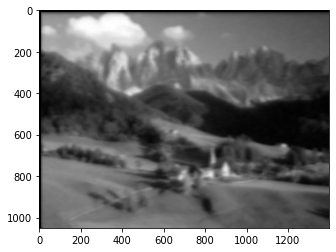

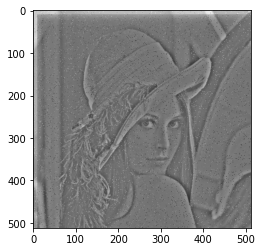

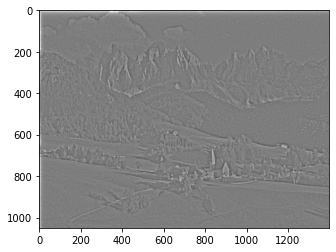

In [12]:
lenna_ruido = colorToGrayscale2(plt.imread("03_spn_lenna.png"))
ci_ruido = colorToGrayscale2(plt.imread("03_spn_ci.png"))

print(lenna_ruido.shape)
print(ci_ruido.shape)

lenna_clean = limpiaRuido(lenna_ruido, 21)
ci_clean = limpiaRuido(ci_ruido, 21)

plt.imshow(lenna_ruido, cmap="gray")
plt.show()
plt.imshow(lenna_clean, cmap="gray")
plt.show()
plt.imshow(ci_ruido, cmap="gray")
plt.show()
plt.imshow(ci_clean, cmap="gray")
plt.show()

lenna_diff = lenna_ruido - lenna_clean
ci_diff = ci_ruido - ci_clean

plt.imshow(lenna_diff, cmap="gray")
plt.show()
plt.imshow(ci_diff, cmap="gray")
plt.show()

---
## Ejercicio 5

Haz una función similar a la del ejercicio 3 pero aplicando la máscara únicamente de la media únicamente a los píxeles con ruido (100% blancos o negros):

In [13]:
def limpiaRuido2(matriz, size):
    matrizLimpia = matriz.copy()
    mitad = int(size/2)
    f = 0
    for fila in matrizLimpia:
        c = 0
        for columna in fila:
            if (columna == 0 or columna == 1):
                matrizLimpia[f,c] = mediaSCentral(matrizLimpia[f-mitad:f+mitad+1,c-mitad:c+mitad+1])
            c += 1
        f += 1
    return matrizLimpia

---
## Ejercicio 6

Importa las imágenes "spn_lenna.png" y "spn_ci_3.png". Visualizalas desde Windows para ver la cantidad de "ruido" que contienen. A continuación, utiliza la función anterior (ejercicio 5) para tratar de eliminar el ruido de ambas utilizando distintos tamaños de máscaras (3,7,21). Guarda todos los resultados obtenidos y compáralos con las imágenes originales ("lenna_gris.png" y "paisaje_gris.png"):

(512, 512)
(1050, 1400)


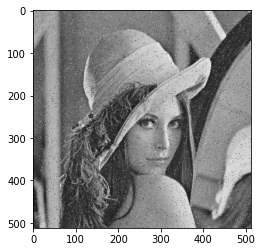

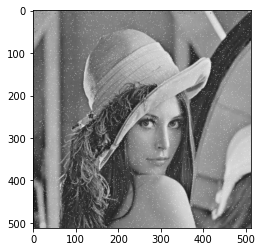

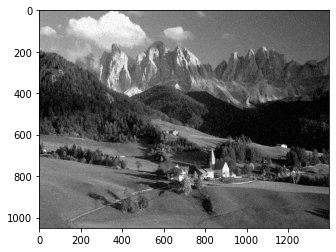

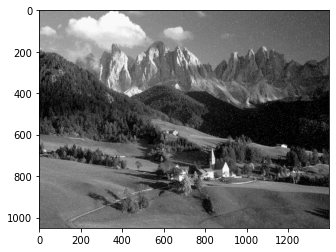

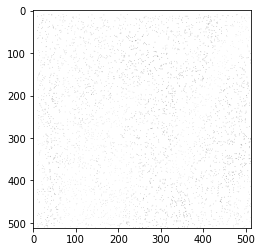

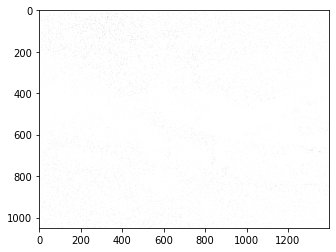

In [14]:
lenna_ruido = colorToGrayscale2(plt.imread("03_spn_lenna.png"))
ci_ruido = colorToGrayscale2(plt.imread("03_spn_ci.png"))

print(lenna_ruido.shape)
print(ci_ruido.shape)


lenna_clean = limpiaRuido2(lenna_ruido, 21)
ci_clean = limpiaRuido2(ci_ruido, 21)

plt.imshow(lenna_ruido, cmap="gray")
plt.show()
plt.imshow(lenna_clean, cmap="gray")
plt.show()
plt.imshow(ci_ruido, cmap="gray")
plt.show()
plt.imshow(ci_clean, cmap="gray")
plt.show()

lenna_diff = lenna_ruido - lenna_clean
ci_diff = ci_ruido - ci_clean

plt.imshow(lenna_diff, cmap="gray")
plt.show()
plt.imshow(ci_diff, cmap="gray")
plt.show()

---
## Ejercicio 7

Haz un análisis de todo lo que has averiguado, aprendido... (tiempos de ejecución, cómo afectan los tamaños de máscaras, comparativa entre la función del ejercicio 4 y el 6...) y déjalo por escrito en la siguiente casilla:

* Cuanto mayor sea la máscara mayor es el tiempo de ejecución (no aumenta linealmente)
* Utilizar la máscara en solo algunos puntos en vez de todos aligera en gran medida la ejecución
* Si se utiliza la máscara indiscriminadamente la imagen se va quedando difusa, cuanto mayor la máscara más difusa